In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Housing - Housing.csv to Housing - Housing.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Housing - Housing.csv']))

In [6]:
print("Missing Values in Each Column:\n")
print(df.isnull().sum())

Missing Values in Each Column:

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [7]:
print("\nDescribing Data\n")
print(df.describe(include='all'))


Describing Data

               price          area    bedrooms   bathrooms     stories  \
count   5.450000e+02    545.000000  545.000000  545.000000  545.000000   
unique           NaN           NaN         NaN         NaN         NaN   
top              NaN           NaN         NaN         NaN         NaN   
freq             NaN           NaN         NaN         NaN         NaN   
mean    4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std     1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min     1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%     3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%     4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%     5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max     1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

       mainroad guestroom basement hotwaterheating airconditioning  \
count       545       5

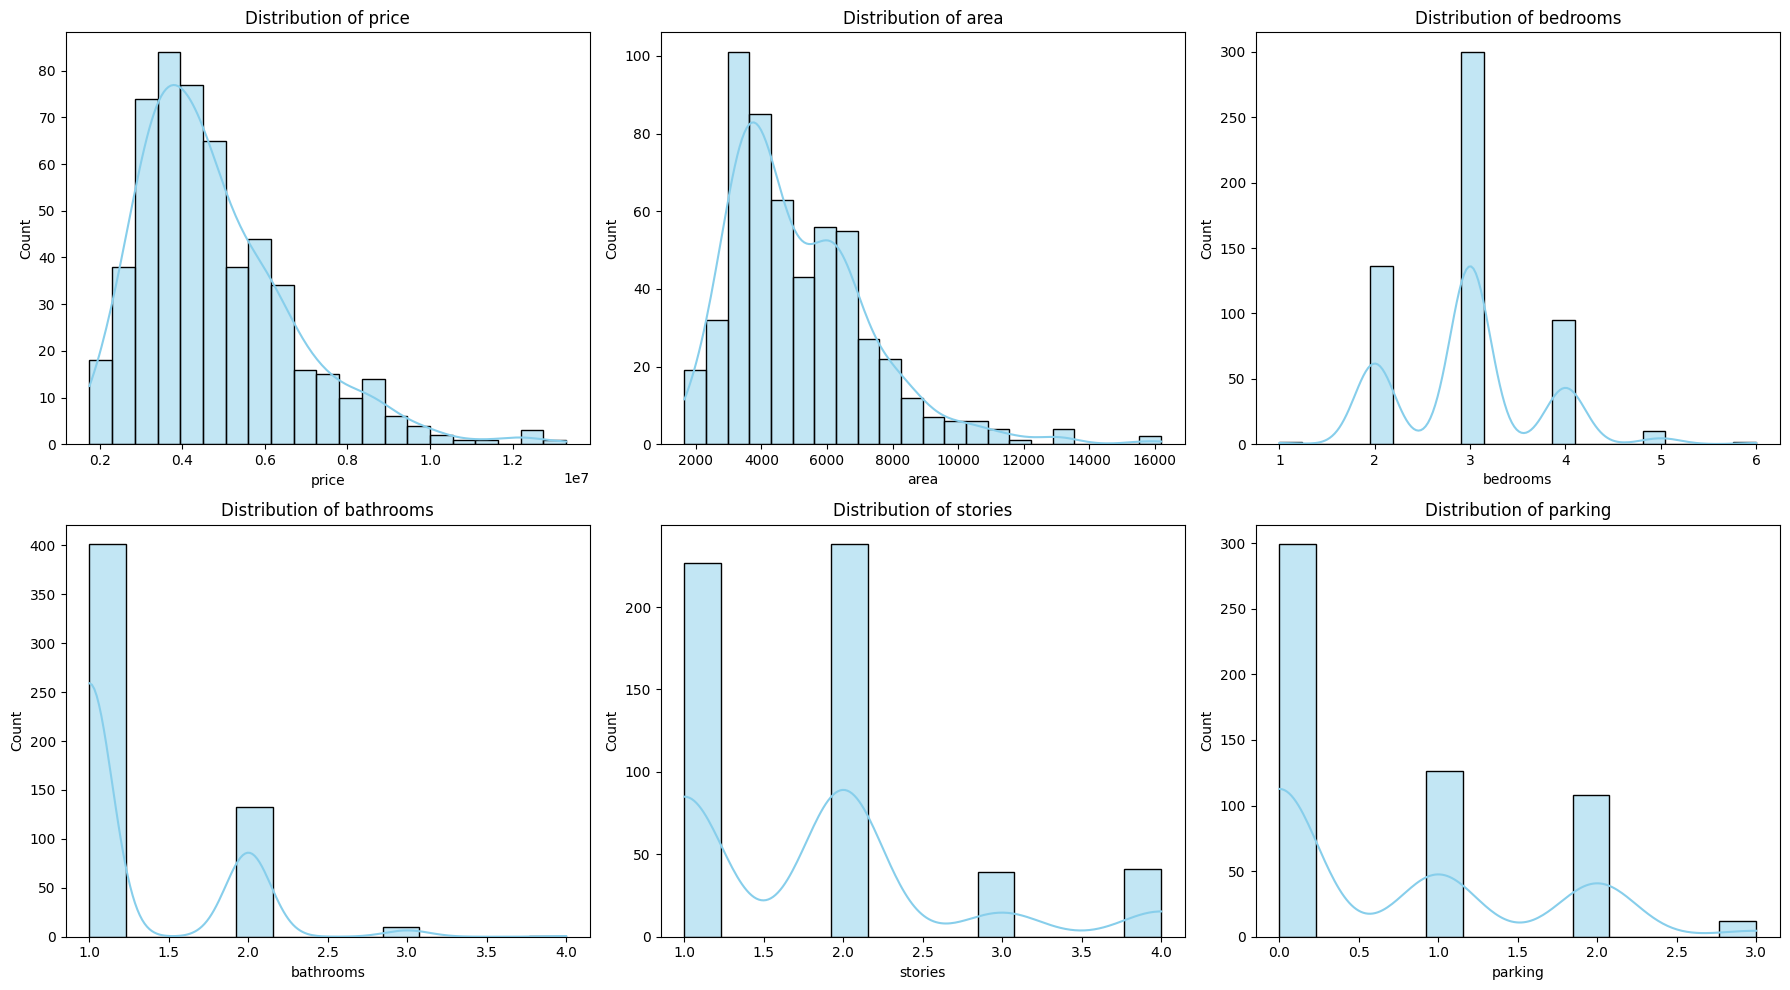

In [8]:
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

<ipython-input-9-3c59d53ee2d7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
<ipython-input-9-3c59d53ee2d7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
<ipython-input-9-3c59d53ee2d7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
<ipython-input-9-3c59d53ee2d7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

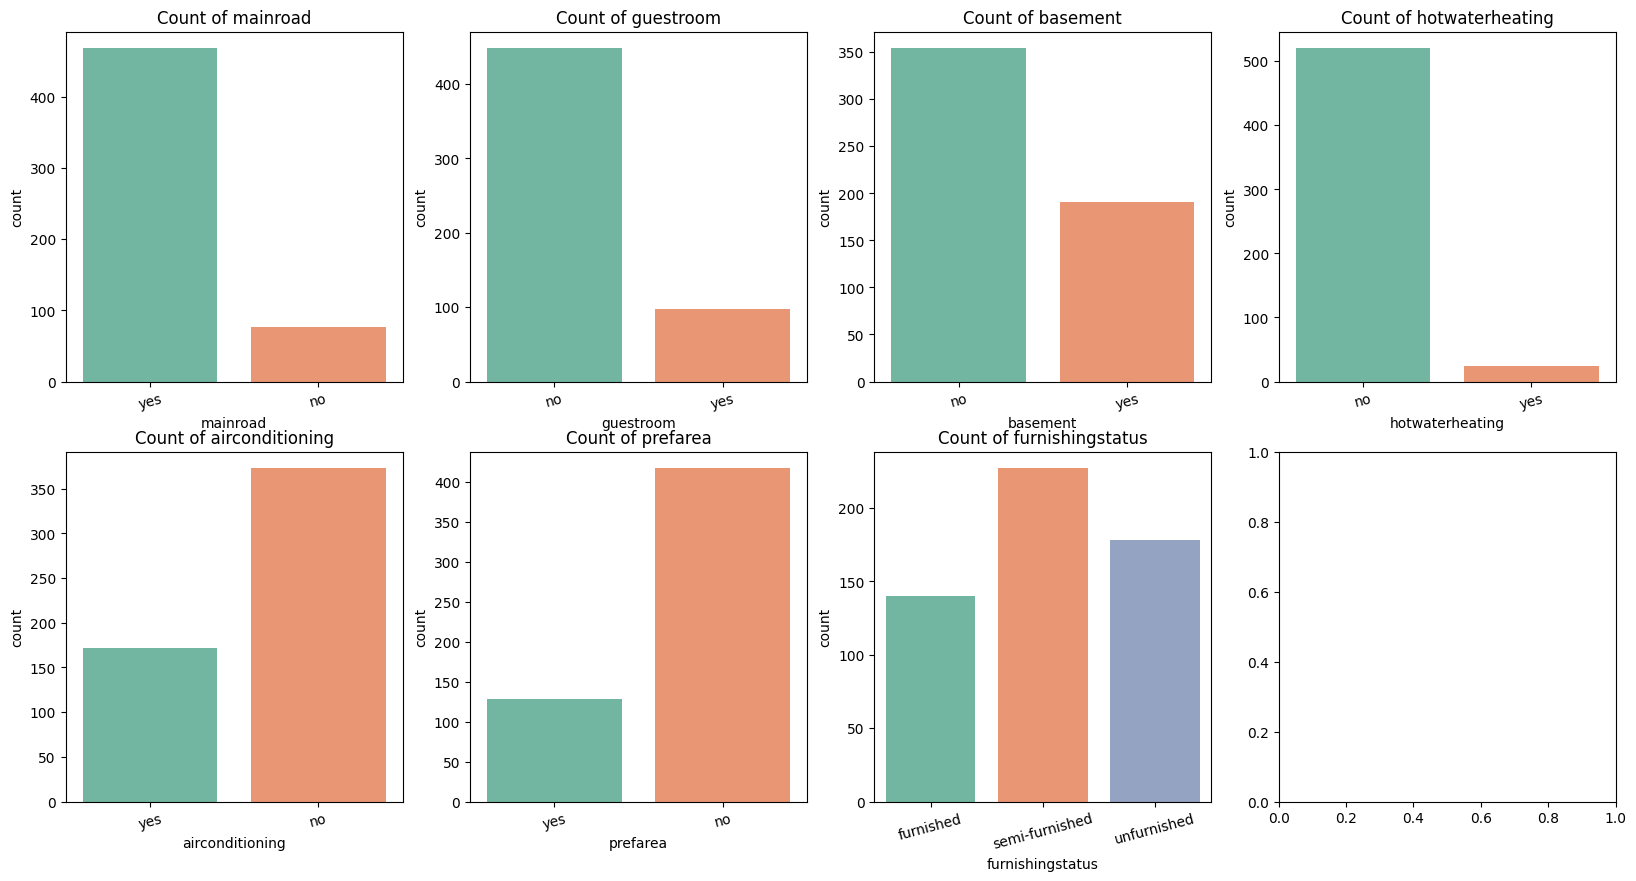

In [9]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
    axes[i].set_title(f'Count of {col}')
    axes[i].tick_params(axis='x', rotation=15)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [15]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = df_encoded.corr()

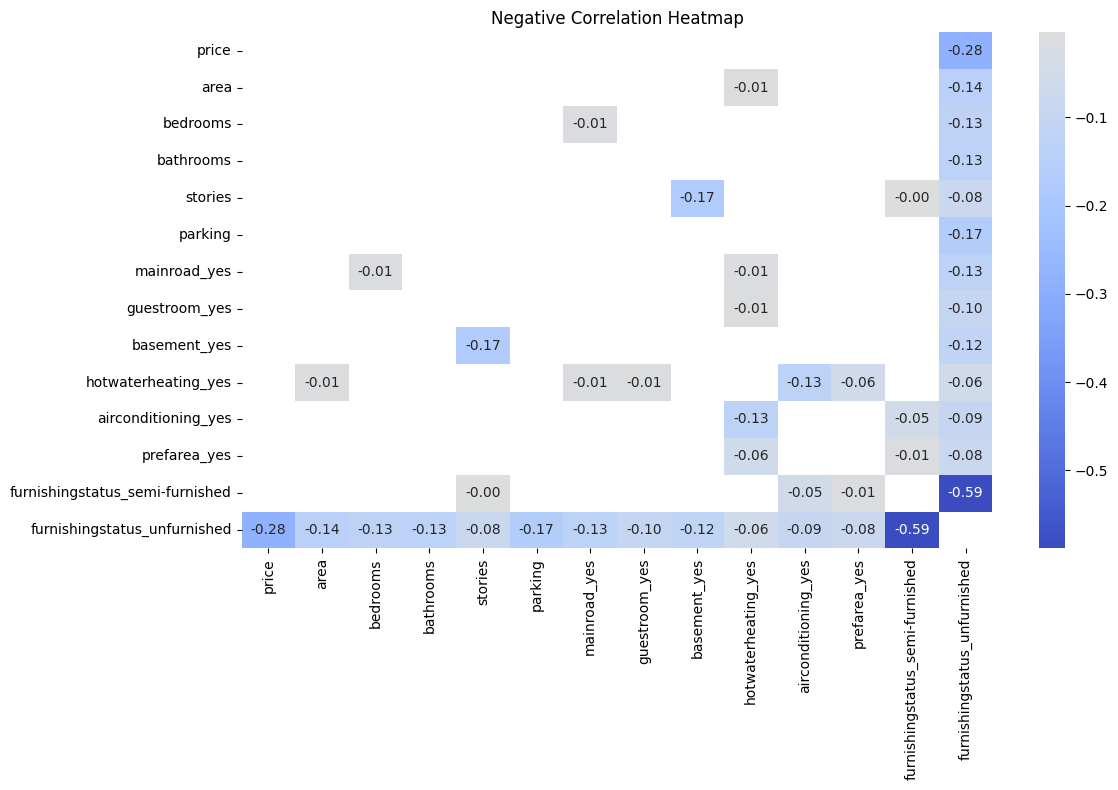

In [16]:
neg_corr_matrix = corr_matrix[corr_matrix < 0]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(neg_corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", cbar=True)
plt.title("Negative Correlation Heatmap")
plt.tight_layout()
plt.show()

In [17]:

corr_with_target = df_encoded.corr()['price']


neg_corr_features = corr_with_target[corr_with_target < 0].index.tolist()


df_positive_corr = df_encoded.drop(columns=neg_corr_features)


print("Removed features (negatively correlated with price):")
print(neg_corr_features)
print("\nNew DataFrame shape:", df_positive_corr.shape)


Removed features (negatively correlated with price):
['furnishingstatus_unfurnished']

New DataFrame shape: (545, 13)


In [19]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)

In [22]:
print(y_pred)

[ 2605867.18706977  3785715.36630262  5830453.03626295  3772476.2670483
  6653642.29679981  6926711.23240274  3549571.63225464  3005890.71583989
  5442249.61217039  3074693.12376205  4940733.24545148  2112961.00349424
  4312033.4915217   4656037.94541144  6603621.60333527  2563198.37932161
  7230806.51462821  6568644.38584486  5245887.46425302  4423510.09761187
  2560090.44186828  1936702.06908881  5998066.56678579  5451939.60477797
  6722018.65204213  6280633.85048403  3739954.20233224  3663360.25445687
  3768942.92282741  3668425.17951792  4349392.40844884  5010992.91315788
  5537023.49085022  5426759.95113955  7374492.38731206  5026094.45449775
  6594125.33716698  2287163.89406428  5290619.38881307  5593149.07451623
  4869626.33480552  5449129.57400823  2871875.37560651  6411624.47845681
  5841201.90430466  7709674.21500624  8327708.01896821  6170570.2837123
  3545161.58745245  5031939.14461835  3413507.10895291  5873195.20678015
  4052486.33684303  4690334.44180635  2832380.1060532

In [23]:
print(y_test)

482    2940000
314    4095000
383    3570000
487    2870000
43     7700000
        ...   
98     6293000
307    4165000
399    3500000
214    4865000
173    5250000
Name: price, Length: 109, dtype: int64


In [25]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [26]:
print(r2)

0.7312408811520074


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
mae = mean_absolute_error(y_test, y_pred)
smae = mae / np.mean(y_test)

In [29]:
print("🔹 Multiple Linear Regression")
print("R² Score:", round(r2, 4))
print("RMSE:", round(rmse, 2))

🔹 Multiple Linear Regression
R² Score: 0.7312
RMSE: 869289.76


In [30]:
print(f"MAE      : {mae:.2f}")
print(f"SMAE     : {smae:.4f}")

MAE      : 706264.65
SMAE     : 0.1533


In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [43]:
# SMAPE function
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

In [61]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=0.2),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor( random_state=10),
    "Gradient Boosting": GradientBoostingRegressor( learning_rate=0.1, random_state=17),
    "XGBoost": XGBRegressor(learning_rate=0.1, random_state=10)
}
results = []

# Evaluate and print metrics clearly
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = round(r2_score(y_test, y_pred), 4)
    mse = round(mean_squared_error(y_test, y_pred), 2)
    rmse = round(np.sqrt(mse), 2)
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    smape_val = round(smape(y_test, y_pred), 2)

    print(f"\n📌 Model: {name}")
    print(f"R² Score     : {r2}")
    print(f"RMSE         : {rmse}")
    print(f"MAE          : {mae}")
    print(f"SMAPE (%)    : {smape_val}")
    print(f"MSE          : {mse}")
    print("-" * 40)


📌 Model: Linear Regression
R² Score     : 0.7312
RMSE         : 869289.76
MAE          : 706264.65
SMAPE (%)    : 15.58
MSE          : 755664686763.83
----------------------------------------

📌 Model: Ridge Regression
R² Score     : 0.7314
RMSE         : 869081.82
MAE          : 705918.47
SMAPE (%)    : 15.57
MSE          : 755303205433.4
----------------------------------------

📌 Model: Lasso Regression
R² Score     : 0.7312
RMSE         : 869289.67
MAE          : 706264.57
SMAPE (%)    : 15.58
MSE          : 755664522092.3
----------------------------------------

📌 Model: Random Forest
R² Score     : 0.6302
RMSE         : 1019685.01
MAE          : 759037.81
SMAPE (%)    : 16.07
MSE          : 1039757517530.92
----------------------------------------

📌 Model: Gradient Boosting
R² Score     : 0.5713
RMSE         : 1097932.82
MAE          : 754038.14
SMAPE (%)    : 15.31
MSE          : 1205456479040.18
----------------------------------------

📌 Model: XGBoost
R² Score     : 0.4952

In [63]:
print(results_df)


     Model      R2        RMSE        MAE           MSE  SMAPE
0  XGBoost  0.4952  1191402.88  787546.62  1.419441e+12  15.93


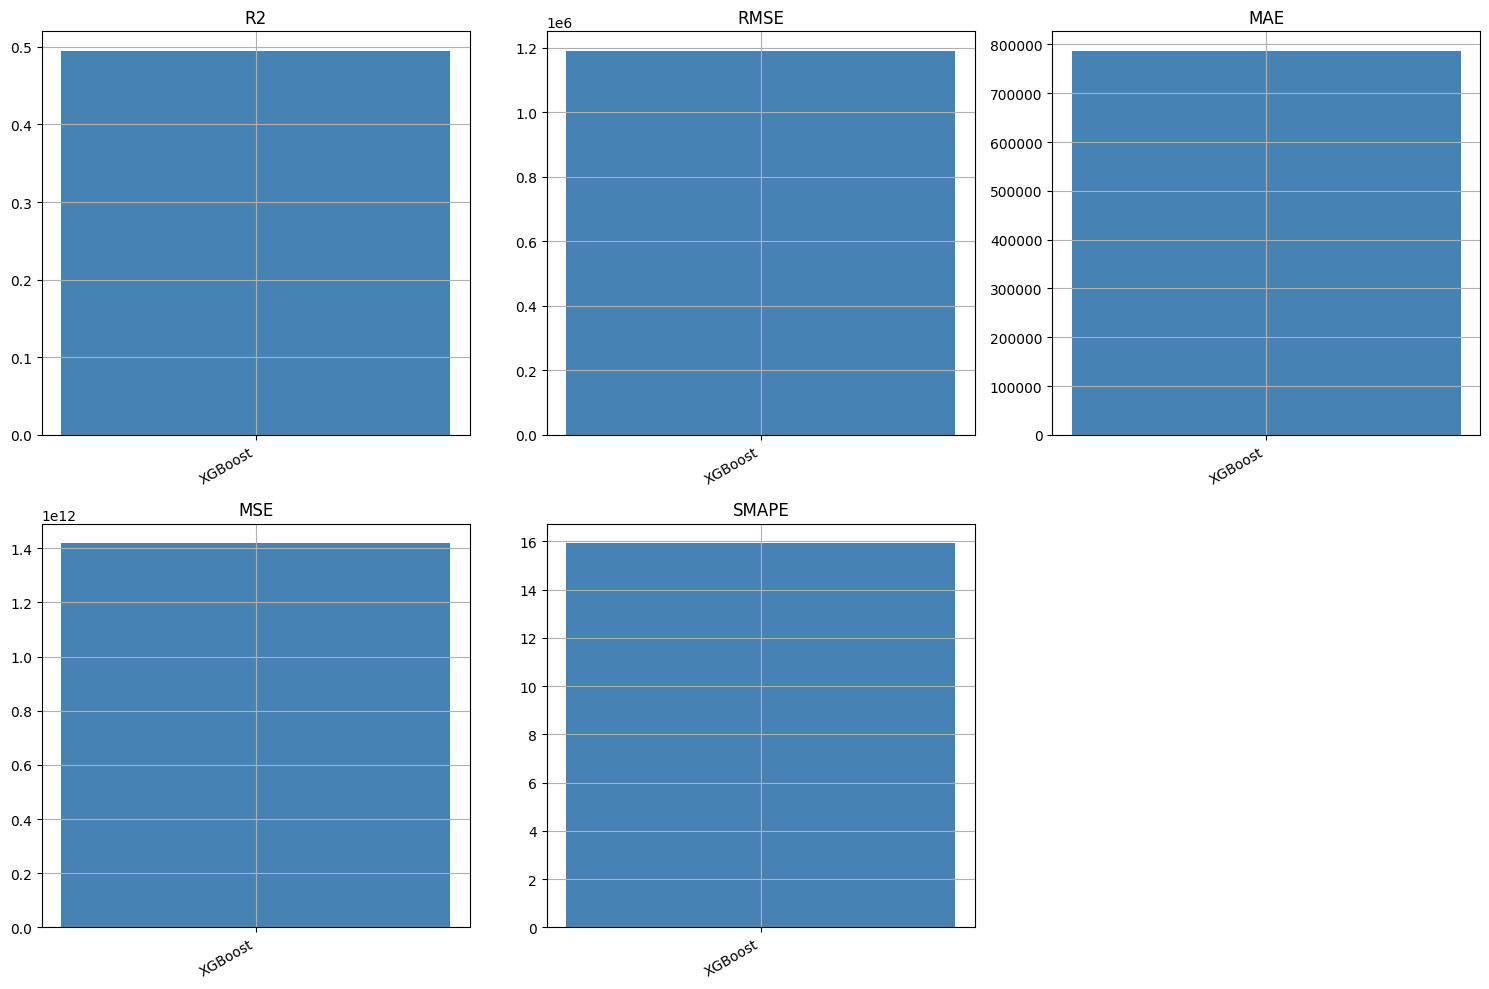

In [62]:
results.append({
        "Model": name,
        "R2": r2,
        "RMSE": rmse,
        "MAE": mae,
        "MSE": mse,
        "SMAPE": smape_val
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot each metric
metrics_to_plot = ["R2", "RMSE", "MAE", "MSE", "SMAPE"]
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    plt.bar(results_df["Model"], results_df[metric], color='steelblue')
    plt.title(metric)
    plt.xticks(rotation=30, ha='right')
    plt.grid(True)

plt.tight_layout()
plt.show()